# Flats Uncleaned Dataset

## imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Read cvs path

In [2]:
path = r'C:\Users\bbuser\Desktop\data_walmart\surat_uncleaned.csv'
df = pd.read_csv(path)
df

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,description,price_per_sqft,price
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,New Property,Poss. by Oct '24,5 out of 10,Unfurnished,West,"Luxury project with basement parking, Solar ro...","₹2,891 per sqft",₹33.8 Lac
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,New Property,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,2 And 3 BHK Luxurious Flat for Sell In New Alt...,"₹3,551 per sqft",₹45.4 Lac
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173 sqft,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,This affordable 2 BHK flat is situated along a...,"₹3,800 per sqft",₹44.6 Lac
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700 sqft,New Property,Ready to Move,6 out of 14,Unfurnished,East,2 BHK Flat For sell IN Jahangirabad Prime Loca...,"₹3,966 per sqft",₹47 Lac
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250 sqft,Orchid Fantasia,New Property,Unfurnished,2,2,"Multistorey Apartment for Sale in Palanpur, Su...","₹3,600 per sqft",₹45 Lac
...,...,...,...,...,...,...,...,...,...,...,...
4520,6 BHK Apartment for Sale in Millionaires Lifes...,Carpet Area,2000 sqft,New Property,Poss. by Dec '26,5 out of 12,Unfurnished,South - East,"Check out Millionaires Lifestyle in Vesu, one ...",NaN,Call for Price
4521,"4 BHK Apartment for Sale in Savan Superia, Alt...",Super Area,3600 sqft,New Property,Poss. by Dec '25,5 out of 16,Unfurnished,South - East,Superia is a premium residential project launc...,NaN,Call for Price
4522,5 BHK Apartment for Sale in Roongta Green Vall...,Carpet Area,2250 sqft,New Property,Poss. by Dec '25,7 out of 13,Unfurnished,North - East,"When it comes to beautiful homes, nothing beat...",NaN,Call for Price
4523,"6 BHK Apartment for Sale in Cellestial Dreams,...",Carpet Area,3450 sqft,New Property,Ready to Move,7 out of 18,Unfurnished,North - West,"DRB Ravani Cellestial Dreams in Vesu, Surat is...",NaN,Call for Price


## exploring data information

In [3]:
print("Dataframe shape:", df.shape)

Dataframe shape: (4525, 11)


In [4]:
print("Dataframe types: ", df.dtypes)

Dataframe types:  property_name     object
areaWithType      object
square_feet       object
transaction       object
status            object
floor             object
furnishing        object
facing            object
description       object
price_per_sqft    object
price             object
dtype: object


In [5]:
df.columns

Index(['property_name', 'areaWithType', 'square_feet', 'transaction', 'status',
       'floor', 'furnishing', 'facing', 'description', 'price_per_sqft',
       'price'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4525 entries, 0 to 4524
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   property_name   4525 non-null   object
 1   areaWithType    4525 non-null   object
 2   square_feet     4525 non-null   object
 3   transaction     4421 non-null   object
 4   status          4524 non-null   object
 5   floor           4480 non-null   object
 6   furnishing      4185 non-null   object
 7   facing          3936 non-null   object
 8   description     3154 non-null   object
 9   price_per_sqft  4157 non-null   object
 10  price           4525 non-null   object
dtypes: object(11)
memory usage: 389.0+ KB


In [7]:
df.describe(include='all')

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,description,price_per_sqft,price
count,4525,4525,4525,4421,4524,4480,4185,3936,3154,4157,4525
unique,1992,6,1399,38,138,222,78,176,2588,2134,841
top,3 BHK Apartment for Sale in Vesu Surat,Super Area,1000 sqft,Resale,Ready to Move,Resale,Unfurnished,East,Multistorey apartment is available for sale. I...,"₹5,000 per sqft",Call for Price
freq,93,2599,77,2197,3078,431,2322,1487,35,64,173


In [8]:
df.isnull().sum() # for missing values

property_name        0
areaWithType         0
square_feet          0
transaction        104
status               1
floor               45
furnishing         340
facing             589
description       1371
price_per_sqft     368
price                0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(109)

## Clean and convert data

Drop unneeded columns

In [10]:
df = df.drop('description', axis=1)

In [11]:
df.head(3)

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,price_per_sqft,price
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,New Property,Poss. by Oct '24,5 out of 10,Unfurnished,West,"₹2,891 per sqft",₹33.8 Lac
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,New Property,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,"₹3,551 per sqft",₹45.4 Lac
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173 sqft,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,"₹3,800 per sqft",₹44.6 Lac


In [12]:
df['furnishing'].unique()

array(['Unfurnished', 'Semi-Furnished', '2', 'Anand Aspire', 'East', '1',
       'Furnished', nan, '3', '1 Covered,', '2 Covered', '1 Covered',
       'Freehold', 'West', '26 Covered', 'Main Road', 'No', 'North',
       '1 Open', '6', 'Co-operative Society', '> 10', '4',
       'Nilkanth Seven Homes', 'Aagam Navkar', '10 Open',
       'Vinayak Enclave', '5 Covered,', 'South -West',
       'Pool, Garden/Park, Main Road', 'Garden/Park, Main Road', '7 m',
       '30 m', '50 Covered,', 'South', '12 m', 'Yes', 'Gruham Luxuria',
       '2 Covered,', 'Congo', 'Prayosha Shine', 'North - East',
       'Vaishnodevi Ideal Homes', 'Santvan Lexon', 'Sangini Epitome',
       '100 Covered', 'Nirvana Gladiolus', '7', '5 Covered', '5',
       'Raghuvir Spalex', '50 Open', 'South - East', 'North - West',
       '20 m', '20 Open', 'Garden/Park', '10 m', 'Sattvam',
       'Pramukh Amaya', 'Sun Sarvam', '3 Covered', '2 Open', '6 m',
       'Avadh Kimberly', 'Happy Glorious', 'DMD Aura', 'Freedom Tower',
  

In [13]:
df['price'].unique()

array(['₹33.8 Lac ', '₹45.4 Lac ', '₹44.6 Lac ', '₹47 Lac ', '₹45 Lac ',
       '₹43.2 Lac ', '₹42.1 Lac ', '₹44.1 Lac ', '₹44.3 Lac ', '₹40 Lac ',
       '₹44 Lac ', '₹12.5 Lac ', '₹50 Lac ', '₹35.8 Lac ', '₹26.5 Lac ',
       '₹42 Lac ', '₹43 Lac ', '₹20 Lac ', '₹37 Lac ', '₹29 Lac ',
       '₹38 Lac ', '₹13 Lac ', '₹46.5 Lac ', '₹41.6 Lac ', '₹33.5 Lac ',
       '₹42.5 Lac ', '₹48 Lac ', '₹32 Lac ', '₹35 Lac ', '₹46.2 Lac ',
       '₹38.5 Lac ', '₹23 Lac ', '₹24 Lac ', '₹28 Lac ', '₹35.7 Lac ',
       '₹36.5 Lac ', '₹36 Lac ', '₹43.6 Lac ', '₹25 Lac ', '₹41 Lac ',
       '₹28.5 Lac ', '₹9 Lac ', '₹30 Lac ', '₹39.5 Lac ', '₹21.5 Lac ',
       '₹10.5 Lac ', '₹18 Lac ', '₹10 Lac ', '₹23.5 Lac ', '₹16.3 Lac ',
       '₹13.5 Lac ', '₹49 Lac ', '₹21 Lac ', '₹39 Lac ', '₹16 Lac ',
       '₹27 Lac ', '₹15 Lac ', '₹39.9 Lac ', '₹7.5 Lac ', '₹12.8 Lac ',
       '₹9.5 Lac ', '₹31.5 Lac ', '₹46 Lac ', '₹6 Lac ', '₹34 Lac ',
       '₹22 Lac ', '₹19 Lac ', '₹8.5 Lac ', '₹11 Lac ', '₹16.5 Lac ',
 

In [14]:
df = df[df['furnishing'].isin(['Furnished', 'Semi-Furnished', 'Unfurnished'])]

In [15]:
df.isnull().sum()

property_name       0
areaWithType        0
square_feet         0
transaction         0
status              0
floor               0
furnishing          0
facing              0
price_per_sqft    256
price               0
dtype: int64

In [16]:
df.shape

(3270, 10)

In [17]:
df['transaction'].unique()

array(['New Property', 'Resale', 'Other'], dtype=object)

In [18]:
df['floor'].unique()

array(['5 out of 10', '6 out of 14', '5 out of 13', '3 out of 14',
       '6 out of 13', '1 out of 1', '7 out of 10', '1 out of 13',
       '4 out of 7', '3 out of 5', '2 out of 5', '5 out of 5',
       'Ground out of 1', '1 out of 5', '7 out of 14', '9 out of 14',
       '5 out of 12', '7 out of 13', '12 out of 14', '10 out of 14',
       '2 out of 12', '3 out of 12', '13 out of 14', '4 out of 14',
       '6 out of 10', '2 out of 4', '1 out of 4', '3 out of 4',
       '9 out of 13', '4 out of 4', 'Ground out of 2', '4 out of 10',
       '5 out of 6', '8 out of 9', '4 out of 5', '2 out of 7',
       '7 out of 7', 'Ground out of 3', '3 out of 10', '8 out of 14',
       '6 out of 7', '2 out of 6', '1 out of 2', '4 out of 8',
       '1 out of 7', '2 out of 3', '1 out of 6', '9 out of 11',
       '14 out of 14', '5 out of 14', '5 out of 7', '8 out of 12',
       '2 out of 2', '7 out of 12', '3 out of 6', '1 out of 12',
       '16 out of 19', '13 out of 13', '6 out of 8', '8 out of 8',
    

In [19]:
df['areaWithType'].unique()

array(['Carpet Area', 'Super Area'], dtype=object)

In [20]:
df['status'].unique()

array(["Poss. by Oct '24", "Poss. by Jan '26", 'Ready to Move',
       "Poss. by Dec '25", "Poss. by Feb '26", "Poss. by Dec '26",
       "Poss. by Apr '25", "Poss. by Jan '25", "Poss. by Dec '24",
       "Poss. by Aug '25", "Poss. by Jul '24", "Poss. by Feb '25",
       "Poss. by May '26", "Poss. by Jun '24", "Poss. by Jul '25",
       "Poss. by May '25", "Poss. by Mar '26", "Poss. by Jun '26",
       "Poss. by Jun '25", "Poss. by Mar '25", "Poss. by Sep '25",
       "Poss. by Apr '26", "Poss. by Nov '24", "Poss. by Aug '24",
       "Poss. by Sep '24", "Poss. by Nov '25", "Poss. by Oct '25",
       "Poss. by Sep '26", "Poss. by Dec '27", "Poss. by Oct '26",
       "Poss. by Jan '27", "Poss. by Apr '27", "Poss. by May '27",
       "Poss. by Mar '27", "Poss. by Jul '26", "Poss. by Aug '26",
       "Poss. by Jul '27", "Poss. by Jun '27", "Poss. by Nov '26",
       "Poss. by Mar '28", "Poss. by Nov '28"], dtype=object)

In [21]:
df['facing'].unique()

array(['West', 'South -West', 'East', 'North - East', 'South - East',
       'Main Road', '3', '2', '1', 'North - West', 'South', '6',
       'Co-operative Society', 'Garden/Park, Main Road', 'Garden/Park',
       '1 Covered', 'North', 'Varni Siddheshwar Heights', 'Salasar Icon',
       'Green Valley', 'Freehold', 'Shyam enclave', 'Rajhans Platinum',
       'Vitthal Bunglows', '1 Open', 'Royal Nest', 'Rajhans Wings',
       '2 Open', 'Gordhan Green Valley Mangalam Park Bldg S',
       'Apt Swaminagar Society', 'Swagat Clifton',
       'Green Arcade Phase 1 And 2', 'Satyam Tower', '4',
       'Suryanjali Residency', 'GHB Mukhya Mantri Gruh Yojana',
       'Madhav Residency', 'Shiv Drashti Residency', 'Gruham Luxuria',
       'SHANKHESHWER COMPLAX', 'JT Stuti Highland', 'Times Galaxy',
       'Savani Prayosha Pride', 'Shayona Janki Residency',
       'Sundaram Residency', 'Silicon Palm', 'Raj Abhishek City Homes',
       'Dhvani Royal Residency', 'Residency', 'Pan Sharanam',
       'Rajh

In [22]:
print("Number of duplicate rows:", df.duplicated().sum())
# Remove duplicated rows
df_cleaned = df.drop_duplicates()

Number of duplicate rows: 78


In [23]:
print("Number of duplicate rows:", df_cleaned.duplicated().sum())

Number of duplicate rows: 0


In [24]:
df_cleaned.isnull().sum()
df_cleaned.isnull().any()       # True/False if any nulls per column
df_cleaned.isnull().values.any() # True if there's *any* null at allb

np.True_

In [25]:
df_cleaned.isnull().sum()


property_name       0
areaWithType        0
square_feet         0
transaction         0
status              0
floor               0
furnishing          0
facing              0
price_per_sqft    252
price               0
dtype: int64

In [26]:
# Replace "Call for Price" and similar text with NaN
df_cleaned['price'] = df_cleaned['price'].replace(['Call for Price', 'call for price'], np.nan)
df_cleaned['price_per_sqft'] = df_cleaned['price_per_sqft'].replace('NaN', np.nan)

C:\Users\bbuser\AppData\Local\Temp\ipykernel_19672\983861045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['price'] = df_cleaned['price'].replace(['Call for Price', 'call for price'], np.nan)
C:\Users\bbuser\AppData\Local\Temp\ipykernel_19672\983861045.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['price_per_sqft'] = df_cleaned['price_per_sqft'].replace('NaN', np.nan)


### convert and clean

In [27]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3192 entries, 0 to 4524
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   property_name   3192 non-null   object
 1   areaWithType    3192 non-null   object
 2   square_feet     3192 non-null   object
 3   transaction     3192 non-null   object
 4   status          3192 non-null   object
 5   floor           3192 non-null   object
 6   furnishing      3192 non-null   object
 7   facing          3192 non-null   object
 8   price_per_sqft  2940 non-null   object
 9   price           3047 non-null   object
dtypes: object(10)
memory usage: 274.3+ KB


In [28]:
# Step 1: Clean 'price' → Remove ₹, Lac, and convert to float
df_cleaned['price'] = (
    df_cleaned['price']
    .astype(str)
    .str.replace('₹', '', regex=False)
    .str.replace('Lac', '', case=False, regex=False)
    .str.replace(',', '', regex=False)
    .str.strip()
)

df_cleaned['price'] = pd.to_numeric(df_cleaned['price'], errors='coerce')

# Step 2: Clean 'price_per_sqft' → remove ₹ and "per sqft"
df_cleaned['price_per_sqft'] = (
    df_cleaned['price_per_sqft']
    .astype(str)
    .str.replace('₹', '', regex=False)
    .str.replace('per sqft', '', case=False, regex=False)
    .str.replace(',', '', regex=False)
    .str.strip()
)

df_cleaned['price_per_sqft'] = pd.to_numeric(df_cleaned['price_per_sqft'], errors='coerce')

# Step 3: Clean 'square_feet' → remove "sqft"
df_cleaned['square_feet'] = (
    df_cleaned['square_feet']
    .astype(str)
    .str.replace('sqft', '', case=False, regex=False)
    .str.replace(',', '', regex=False)
    .str.strip()
)

df_cleaned['square_feet'] = pd.to_numeric(df_cleaned['square_feet'], errors='coerce')

# Step 4: Rename columns
df_cleaned.rename(columns={
    'price': 'price_lakhs',
    'price_per_sqft': 'price_per_sqft_rs',
    'square_feet': 'area_sqft'
}, inplace=True)


C:\Users\bbuser\AppData\Local\Temp\ipykernel_19672\2323467862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['price'] = (
C:\Users\bbuser\AppData\Local\Temp\ipykernel_19672\2323467862.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['price'] = pd.to_numeric(df_cleaned['price'], errors='coerce')
C:\Users\bbuser\AppData\Local\Temp\ipykernel_19672\2323467862.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [29]:
df_cleaned['price_per_sqft_rs'] = (df_cleaned['price_lakhs'] * 1e5) / df_cleaned['area_sqft']
df_cleaned.head(3)

C:\Users\bbuser\AppData\Local\Temp\ipykernel_19672\991721714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['price_per_sqft_rs'] = (df_cleaned['price_lakhs'] * 1e5) / df_cleaned['area_sqft']


,property_name,areaWithType,area_sqft,transaction,status,floor,furnishing,facing,price_per_sqft_rs,price_lakhs
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644.0,New Property,Poss. by Oct '24,5 out of 10,Unfurnished,West,5248.447205,33.8
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278.0,New Property,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,3552.425665,45.4
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173.0,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,3802.216539,44.6


In [30]:
# 1. Recalculate missing price_lakhs
mask1 = df_cleaned['price_lakhs'].isna() & df_cleaned['area_sqft'].notna() & df_cleaned['price_per_sqft_rs'].notna()
df_cleaned.loc[mask1, 'price_lakhs'] = (df_cleaned.loc[mask1, 'area_sqft'] * df_cleaned.loc[mask1, 'price_per_sqft_rs']) / 1e5

# 2. Recalculate missing price_per_sqft_rs
mask2 = df_cleaned['price_per_sqft_rs'].isna() & df_cleaned['price_lakhs'].notna() & df_cleaned['area_sqft'].notna()
df_cleaned.loc[mask2, 'price_per_sqft_rs'] = (df_cleaned.loc[mask2, 'price_lakhs'] * 1e5) / df_cleaned.loc[mask2, 'area_sqft']

# 3. Recalculate missing area_sqft
mask3 = df_cleaned['area_sqft'].isna() & df_cleaned['price_lakhs'].notna() & df_cleaned['price_per_sqft_rs'].notna()
df_cleaned.loc[mask3, 'area_sqft'] = (df_cleaned.loc[mask3, 'price_lakhs'] * 1e5) / df_cleaned.loc[mask3, 'price_per_sqft_rs']


In [31]:
# fill empty with median or mode or drop null values?
df_cleaned.dropna(subset=['area_sqft', 'price_lakhs', 'price_per_sqft_rs'], inplace=True)

C:\Users\bbuser\AppData\Local\Temp\ipykernel_19672\1727351385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.dropna(subset=['area_sqft', 'price_lakhs', 'price_per_sqft_rs'], inplace=True)


In [32]:
df_cleaned.isnull().sum()

property_name        0
areaWithType         0
area_sqft            0
transaction          0
status               0
floor                0
furnishing           0
facing               0
price_per_sqft_rs    0
price_lakhs          0
dtype: int64

In [33]:
df_cleaned.shape # lost so much data but better for ML testing

(1944, 10)

Strip white space from category column names

In [34]:
for col in df_cleaned.select_dtypes(include='object').columns:
    df_cleaned[col] = df_cleaned[col].str.strip()

C:\Users\bbuser\AppData\Local\Temp\ipykernel_19672\267234039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].str.strip()


make columns consistent

In [35]:
for col in ['transaction', 'status', 'furnishing', 'facing']:
    df[col] = df[col].str.lower().str.strip()

extract floor

In [36]:
def extract_floor(val):
    if pd.isna(val): return np.nan
    match = re.search(r'^(\d+)', str(val))
    return float(match.group(1)) if match else np.nan

df_cleaned['floor'] = df_cleaned['floor'].apply(extract_floor)

C:\Users\bbuser\AppData\Local\Temp\ipykernel_19672\1926380350.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['floor'] = df_cleaned['floor'].apply(extract_floor)


reset index

In [37]:
df_cleaned.reset_index(drop=True, inplace=True)

In [38]:
df_cleaned.head(3)

,property_name,areaWithType,area_sqft,transaction,status,floor,furnishing,facing,price_per_sqft_rs,price_lakhs
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644.0,New Property,Poss. by Oct '24,5.0,Unfurnished,West,5248.447205,33.8
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278.0,New Property,Poss. by Jan '26,6.0,Unfurnished,South -West,3552.425665,45.4
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173.0,Resale,Ready to Move,5.0,Semi-Furnished,East,3802.216539,44.6


## checking 

In [39]:
df_cleaned.dtypes # since some are still incorrect ill fix and check again

property_name         object
areaWithType          object
area_sqft            float64
transaction           object
status                object
floor                float64
furnishing            object
facing                object
price_per_sqft_rs    float64
price_lakhs          float64
dtype: object

In [40]:
df_cleaned.head(10)

,property_name,areaWithType,area_sqft,transaction,status,floor,furnishing,facing,price_per_sqft_rs,price_lakhs
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644.0,New Property,Poss. by Oct '24,5.0,Unfurnished,West,5248.447205,33.8
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278.0,New Property,Poss. by Jan '26,6.0,Unfurnished,South -West,3552.425665,45.4
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173.0,Resale,Ready to Move,5.0,Semi-Furnished,East,3802.216539,44.6
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700.0,New Property,Ready to Move,6.0,Unfurnished,East,6714.285714,47.0
4,2 BHK Apartment for Sale in Palanpur Surat,Carpet Area,720.0,New Property,Poss. by Dec '25,3.0,Unfurnished,East,5555.555556,40.0
5,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,748.0,New Property,Poss. by Dec '25,6.0,Unfurnished,East,5882.352941,44.0
6,1 BHK House for Sale in Kim Surat,Carpet Area,480.0,Resale,Ready to Move,1.0,Unfurnished,East,2604.166667,12.5
7,2 BHK Apartment for Sale in NavYug College Surat,Carpet Area,1650.0,Resale,Ready to Move,7.0,Unfurnished,East,3030.303030,50.0
8,2 BHK Apartment for Sale in Adajan Surat,Super Area,847.0,Resale,Ready to Move,1.0,Furnished,East,5903.187721,50.0
9,3 BHK Apartment for Sale in Dindoli Surat,Super Area,1511.0,New Property,Poss. by Feb '26,5.0,Unfurnished,North - East,2369.291860,35.8


# FEATURE ENGINEERING

In [41]:
for col in ['transaction', 'status', 'furnishing', 'facing']:
    df_cleaned[col] = df_cleaned[col].astype('category') # putting in category. !important step!

C:\Users\bbuser\AppData\Local\Temp\ipykernel_19672\1879466923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].astype('category') # putting in category. !important step!
C:\Users\bbuser\AppData\Local\Temp\ipykernel_19672\1879466923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].astype('category') # putting in category. !important step!
C:\Users\bbuser\AppData\Local\Temp\ipykernel_19672\1879466923.py:2: SettingWithCopyWarning: 
A val

In [42]:
# 1. Total price in ₹ (Lakhs → ₹)
df_cleaned['total_price_rs'] = df_cleaned['price_lakhs'] * 1e5

# 2. Floor ratio (if total floors available later)
# df_cleaned['floor_ratio'] = df_cleaned['floor'] / df_cleaned['total_floors']

# 3. BHK from property name (example)
df_cleaned['bhk'] = df_cleaned['property_name'].str.extract(r'(\d+)\s*BHK').astype(float)

# 4. Boolean features
df_cleaned['is_furnished'] = df_cleaned['furnishing'].apply(lambda x: 1 if 'furnished' in str(x).lower() else 0)

# 5. Encode categories (Label Encoding)
from sklearn.preprocessing import LabelEncoder

label_cols = ['transaction', 'status', 'furnishing', 'facing']
for col in label_cols:
    df_cleaned[col + '_encoded'] = LabelEncoder().fit_transform(df_cleaned[col].astype(str))


C:\Users\bbuser\AppData\Local\Temp\ipykernel_19672\1621267632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['total_price_rs'] = df_cleaned['price_lakhs'] * 1e5
C:\Users\bbuser\AppData\Local\Temp\ipykernel_19672\1621267632.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['bhk'] = df_cleaned['property_name'].str.extract(r'(\d+)\s*BHK').astype(float)
C:\Users\bbuser\AppData\Local\Temp\ipykernel_19672\1621267632.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy

## Training model

Train-Test Split


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


features = ['area_sqft', 'floor', 'bhk', 'is_furnished',
            'transaction_encoded', 'status_encoded', 'furnishing_encoded', 'facing_encoded']

X = df_cleaned[features]
y = df_cleaned['price_lakhs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Regression Model

model = LinearRegression()

# Fill NaNs in training and testing features
X_train = X_train.fillna(X_train.median(numeric_only=True))
X_test = X_test.fillna(X_train.median(numeric_only=True))  # use training median


model.fit(X_train, y_train)


LinearRegression()

### ENCODING

C:\Users\bbuser\AppData\Local\Temp\ipykernel_19672\3890790964.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].astype(str).str.lower().str.strip()
C:\Users\bbuser\AppData\Local\Temp\ipykernel_19672\3890790964.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].astype(str).str.lower().str.strip()
C:\Users\bbuser\AppData\Local\Temp\ipykernel_19672\3890790964.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

R² Score: 0.3643


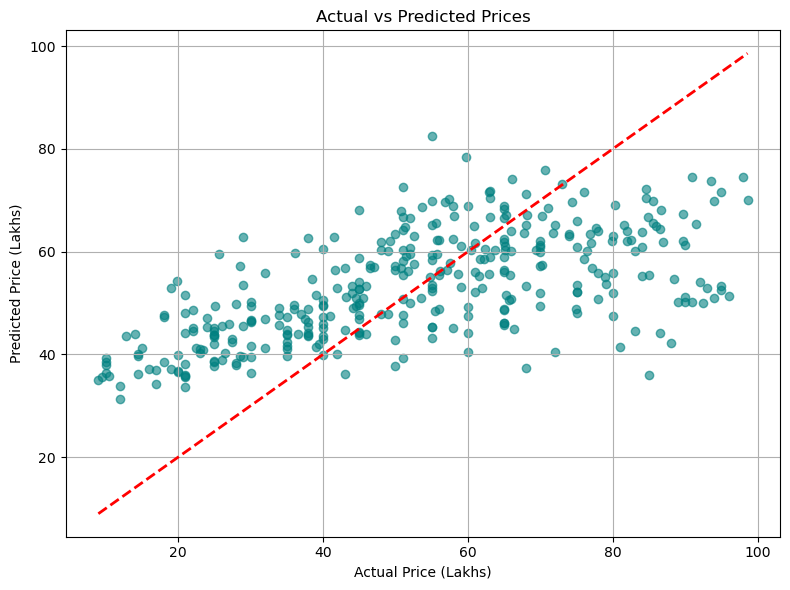

In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 1. Clean Categorical Columns (strip + lowercase)
categorical_cols = ['transaction', 'status', 'furnishing', 'facing']
for col in categorical_cols:
    df_cleaned[col] = df_cleaned[col].astype(str).str.lower().str.strip()

# 2. Encode Categorical Columns with LabelEncoder
label_encoders = {}  # store encoders for later use or inverse_transform
for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col + '_encoded'] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le  # save encoder

# 3. Define Features and Target
features = [
    'area_sqft',
    'price_per_sqft_rs',
    'floor',
    'transaction_encoded',
    'status_encoded',
    'furnishing_encoded',
    'facing_encoded'
]

X = df_cleaned[features]
y = df_cleaned['price_lakhs']

# 4. Drop any remaining nulls in X or y
X = X.dropna()
y = y.loc[X.index]  # ensure alignment

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# 7. Predict and Evaluate with R² Score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

# 8. (Optional) Visualize Actual vs Predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Price (Lakhs)')
plt.ylabel('Predicted Price (Lakhs)')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.tight_layout()
plt.show()
